##### <font color = 'green'> Exploratory Analysis for covid cases and a stochastic model that predicts the emergence at the icu.

#### <font color = 'gold'> Delivered by: Olanrewaju Adegoke

In [1]:
# Reserved for libraries installations

In [2]:
!pip install openpyxl


[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
# import necessary libraries

In [4]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

C:\Users\Olanrewaju Adegoke\AppData\Local\Temp\ipykernel_15116\1191458605.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [5]:
# Reserved for defining the folders path

In [6]:
data_path = '../data/'

model_path = '../models/'

data_transform_path = '../transformations/'

visual_path = '../visuals/'

output_path = '../outputs/'

###### Load the dataset

In [7]:
covid_data = pd.read_excel(data_path + 'covid_cases.xlsx', sheet_name=['covid','Sheet1'])

###### Load each of the sheet that is contains in the excel workbook

In [8]:
covid_df = covid_data['covid']
covid_df.head()

,id,sex,patient_type,entry_date,date_symptoms,date_died,intubed,pneumonia,age,pregnancy,...,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res,icu
0,16169f,2,1,2020-04-05 00:00:00,2020-02-05 00:00:00,9999-99-99,97,2,27,97,...,2,2,2,2,2,2,2,2,1,97
1,1009bf,2,1,19-03-2020,17-03-2020,9999-99-99,97,2,24,97,...,2,2,2,2,2,2,2,99,1,97
2,167386,1,2,2020-06-04 00:00:00,2020-01-04 00:00:00,9999-99-99,2,2,54,2,...,2,2,2,2,1,2,2,99,1,2
3,0b5948,2,2,17-04-2020,2020-10-04 00:00:00,9999-99-99,2,1,30,97,...,2,2,2,2,2,2,2,99,1,2
4,0d01b5,1,2,13-04-2020,13-04-2020,22-04-2020,2,2,60,2,...,2,1,2,1,2,2,2,99,1,2


In [9]:
column_description = covid_data['Sheet1']
column_description

,Unnamed: 0
0,NaN
1,Data Dictionary:
2,1. id: The identification number of the patient
3,.
4,"2. sex: Identify gender of the patient, 1 as f..."
5,"3. patient_type: Type of patient, 1 for not ho..."
6,4. entry_date: The date that the patient went ...
7,5. date_symptoms: The date that the patient st...
8,"6. date_died: The date that the patient died, ..."
9,7. intubed: Intubation is a procedure that’s u...


In [10]:
covid_df.shape

(566602, 23)

In [11]:
covid_df.info() # Describe info of the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 566602 entries, 0 to 566601
Data columns (total 23 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   id                   566602 non-null  object
 1   sex                  566602 non-null  int64 
 2   patient_type         566602 non-null  int64 
 3   entry_date           566602 non-null  object
 4   date_symptoms        566602 non-null  object
 5   date_died            566602 non-null  object
 6   intubed              566602 non-null  int64 
 7   pneumonia            566602 non-null  int64 
 8   age                  566602 non-null  int64 
 9   pregnancy            566602 non-null  int64 
 10  diabetes             566602 non-null  int64 
 11  copd                 566602 non-null  int64 
 12  asthma               566602 non-null  int64 
 13  inmsupr              566602 non-null  int64 
 14  hypertension         566602 non-null  int64 
 15  other_disease        566602 non-nu

### EXPLORATORY DATA ANALYSIS - EDA

In [12]:
sample_covid = covid_df.sample(20)
sample_covid.head()

,id,sex,patient_type,entry_date,date_symptoms,date_died,intubed,pneumonia,age,pregnancy,...,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res,icu
524414,0f4ae8,2,2,26-06-2020,22-06-2020,9999-99-99,2,1,65,97,...,2,2,2,2,2,2,2,2,3,2
399919,17e983,1,1,20-05-2020,18-05-2020,9999-99-99,97,2,32,2,...,2,2,2,2,2,2,2,1,2,97
354942,0ed060,1,1,14-04-2020,2020-10-04 00:00:00,9999-99-99,97,2,23,2,...,2,2,2,2,1,2,1,2,2,97
464390,1d65b2,1,1,22-06-2020,21-06-2020,9999-99-99,97,2,49,2,...,2,2,2,2,2,2,2,1,2,97
243713,8160,2,1,15-05-2020,2020-07-05 00:00:00,9999-99-99,97,2,51,97,...,2,1,2,2,1,2,2,1,2,97


In [13]:
sample_covid.columns

Index(['id', 'sex', 'patient_type', 'entry_date', 'date_symptoms', 'date_died',
       'intubed', 'pneumonia', 'age', 'pregnancy', 'diabetes', 'copd',
       'asthma', 'inmsupr', 'hypertension', 'other_disease', 'cardiovascular',
       'obesity', 'renal_chronic', 'tobacco', 'contact_other_covid',
       'covid_res', 'icu'],
      dtype='object')

In [14]:
sample_covid.icu.unique()

array([ 2, 97,  1], dtype=int64)

In [15]:
sample_covid.rename(columns={'sex':'gender'}, inplace=True)
sample_covid.head()

,id,gender,patient_type,entry_date,date_symptoms,date_died,intubed,pneumonia,age,pregnancy,...,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res,icu
524414,0f4ae8,2,2,26-06-2020,22-06-2020,9999-99-99,2,1,65,97,...,2,2,2,2,2,2,2,2,3,2
399919,17e983,1,1,20-05-2020,18-05-2020,9999-99-99,97,2,32,2,...,2,2,2,2,2,2,2,1,2,97
354942,0ed060,1,1,14-04-2020,2020-10-04 00:00:00,9999-99-99,97,2,23,2,...,2,2,2,2,1,2,1,2,2,97
464390,1d65b2,1,1,22-06-2020,21-06-2020,9999-99-99,97,2,49,2,...,2,2,2,2,2,2,2,1,2,97
243713,8160,2,1,15-05-2020,2020-07-05 00:00:00,9999-99-99,97,2,51,97,...,2,1,2,2,1,2,2,1,2,97


In [16]:
# Create a new column in the dataset

sample_covid['new'] = '40'
sample_covid.head()

,id,gender,patient_type,entry_date,date_symptoms,date_died,intubed,pneumonia,age,pregnancy,...,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res,icu,new
524414,0f4ae8,2,2,26-06-2020,22-06-2020,9999-99-99,2,1,65,97,...,2,2,2,2,2,2,2,3,2,40
399919,17e983,1,1,20-05-2020,18-05-2020,9999-99-99,97,2,32,2,...,2,2,2,2,2,2,1,2,97,40
354942,0ed060,1,1,14-04-2020,2020-10-04 00:00:00,9999-99-99,97,2,23,2,...,2,2,2,1,2,1,2,2,97,40
464390,1d65b2,1,1,22-06-2020,21-06-2020,9999-99-99,97,2,49,2,...,2,2,2,2,2,2,1,2,97,40
243713,8160,2,1,15-05-2020,2020-07-05 00:00:00,9999-99-99,97,2,51,97,...,1,2,2,1,2,2,1,2,97,40


In [17]:
print(sample_covid['new'] * 2) # This column appears to be string

524414    4040
399919    4040
354942    4040
464390    4040
243713    4040
1907      4040
169966    4040
38532     4040
301793    4040
108831    4040
508661    4040
343766    4040
541970    4040
151515    4040
183658    4040
105366    4040
37476     4040
432557    4040
168543    4040
233684    4040
Name: new, dtype: object


In [18]:
sample_covid.dtypes   # object is 'string' and int64 or int32 or float64 or float32 are 'numeric'

id                     object
gender                  int64
patient_type            int64
entry_date             object
date_symptoms          object
date_died              object
intubed                 int64
pneumonia               int64
age                     int64
pregnancy               int64
diabetes                int64
copd                    int64
asthma                  int64
inmsupr                 int64
hypertension            int64
other_disease           int64
cardiovascular          int64
obesity                 int64
renal_chronic           int64
tobacco                 int64
contact_other_covid     int64
covid_res               int64
icu                     int64
new                    object
dtype: object

In [19]:
# Remove the unwanted column

sample_covid.drop(columns='new', inplace=True)  # with inplace=True permanently delete the columns from the dataset

In [20]:
sample_covid.head()

,id,gender,patient_type,entry_date,date_symptoms,date_died,intubed,pneumonia,age,pregnancy,...,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res,icu
524414,0f4ae8,2,2,26-06-2020,22-06-2020,9999-99-99,2,1,65,97,...,2,2,2,2,2,2,2,2,3,2
399919,17e983,1,1,20-05-2020,18-05-2020,9999-99-99,97,2,32,2,...,2,2,2,2,2,2,2,1,2,97
354942,0ed060,1,1,14-04-2020,2020-10-04 00:00:00,9999-99-99,97,2,23,2,...,2,2,2,2,1,2,1,2,2,97
464390,1d65b2,1,1,22-06-2020,21-06-2020,9999-99-99,97,2,49,2,...,2,2,2,2,2,2,2,1,2,97
243713,8160,2,1,15-05-2020,2020-07-05 00:00:00,9999-99-99,97,2,51,97,...,2,1,2,2,1,2,2,1,2,97


In [21]:
sample_covid.dtypes

id                     object
gender                  int64
patient_type            int64
entry_date             object
date_symptoms          object
date_died              object
intubed                 int64
pneumonia               int64
age                     int64
pregnancy               int64
diabetes                int64
copd                    int64
asthma                  int64
inmsupr                 int64
hypertension            int64
other_disease           int64
cardiovascular          int64
obesity                 int64
renal_chronic           int64
tobacco                 int64
contact_other_covid     int64
covid_res               int64
icu                     int64
dtype: object

##### We would treat 'icu' as a target variable - we use the original dataset
icu: indicates whether patient had been admitted to an intensive care unit(icu). '1' means 'yes', '2' means 'no' while ['97','98','99'] means not specified.

In [22]:
# Observe the labels in the target variable - frequency of the outcome variable labels

covid_df.icu.value_counts()

icu
97    444689
2     111676
1      10112
99       125
Name: count, dtype: int64

In [23]:
# Extract the samples from the data with proper icu

labels = [1,2]
icu_df = covid_df[covid_df['icu'].isin(labels)]
icu_df.head()

,id,sex,patient_type,entry_date,date_symptoms,date_died,intubed,pneumonia,age,pregnancy,...,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res,icu
2,167386,1,2,2020-06-04 00:00:00,2020-01-04 00:00:00,9999-99-99,2,2,54,2,...,2,2,2,2,1,2,2,99,1,2
3,0b5948,2,2,17-04-2020,2020-10-04 00:00:00,9999-99-99,2,1,30,97,...,2,2,2,2,2,2,2,99,1,2
4,0d01b5,1,2,13-04-2020,13-04-2020,22-04-2020,2,2,60,2,...,2,1,2,1,2,2,2,99,1,2
5,1beec8,2,2,16-04-2020,16-04-2020,29-04-2020,2,1,47,97,...,2,2,2,2,2,2,2,99,1,1
6,1.75E+56,2,2,22-04-2020,13-04-2020,9999-99-99,2,2,63,97,...,2,1,2,2,2,2,2,99,1,2


In [24]:
icu_df.icu.value_counts()

icu
2    111676
1     10112
Name: count, dtype: int64

In [25]:
# Extract the samples from the data with 'not specified'

labels = [97,98,99]
icu_not_spec = covid_df[covid_df['icu'].isin(labels)]
icu_not_spec.icu.value_counts()

icu
97    444689
99       125
Name: count, dtype: int64

In [26]:
# We have to adopt the icu_df
icu_df.icu.value_counts()

icu
2    111676
1     10112
Name: count, dtype: int64

There is a data imbalance here and we need to correct this before setting out for the modeling

#### Visualizations

<Axes: xlabel='icu', ylabel='count'>

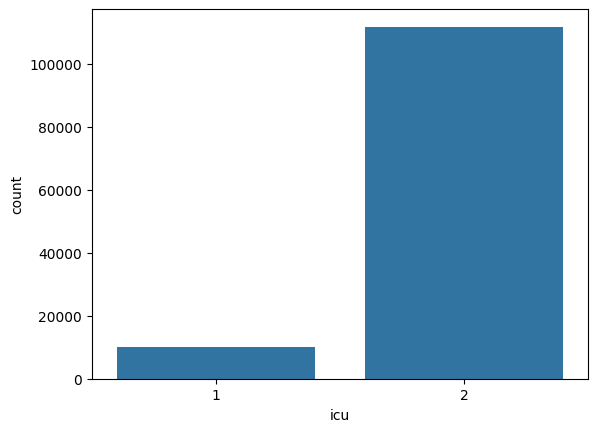

In [27]:
sb.countplot(x='icu', data=icu_df)

We can deduce that there is a huge data imbalance here which will lead to biasness. This shows that we have less people in the icu compared to those not in icu.

<Axes: xlabel='pneumonia', ylabel='count'>

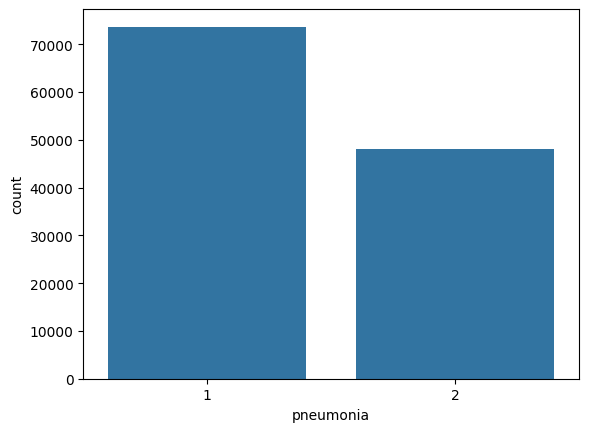

In [28]:
sb.countplot(x='pneumonia', data=icu_df)

<Axes: xlabel='icu', ylabel='count'>

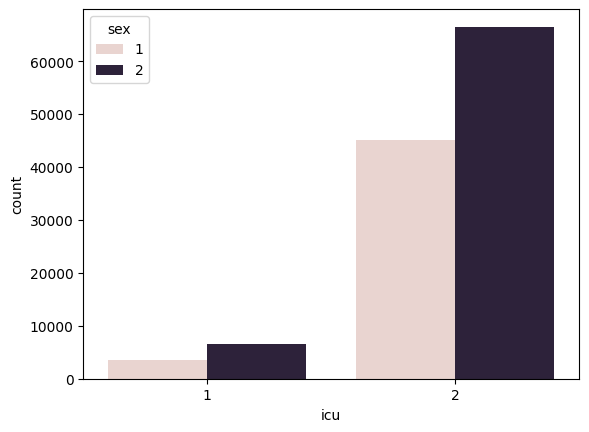

In [29]:
sb.countplot(x='icu', hue='sex', data=icu_df)

Of those in the icu, we have more male than female and also for those not in icu, more male tends to out numbered the females that are not in icu.

In [30]:
# Taking a sample will still gives the same result

sample = icu_df.sample(1000)
sample.head()

,id,sex,patient_type,entry_date,date_symptoms,date_died,intubed,pneumonia,age,pregnancy,...,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res,icu
192446,1b1200,2,2,20-04-2020,13-04-2020,9999-99-99,2,2,23,97,...,2,2,2,2,2,2,2,99,1,2
273579,0b65fe,1,2,2020-10-05 00:00:00,2020-09-05 00:00:00,25-05-2020,1,1,65,2,...,2,1,2,2,1,2,2,2,2,1
274802,04ba7a,2,2,2020-08-05 00:00:00,2020-08-05 00:00:00,9999-99-99,2,2,41,97,...,2,2,2,2,2,2,2,2,2,2
58914,0d7d90,1,2,2020-04-06 00:00:00,2020-03-06 00:00:00,9999-99-99,2,1,34,2,...,1,2,2,2,2,2,2,99,1,2
116261,10bc4f,2,2,25-05-2020,25-05-2020,9999-99-99,2,1,29,97,...,2,2,2,2,2,2,2,99,1,2


<Axes: xlabel='icu', ylabel='count'>

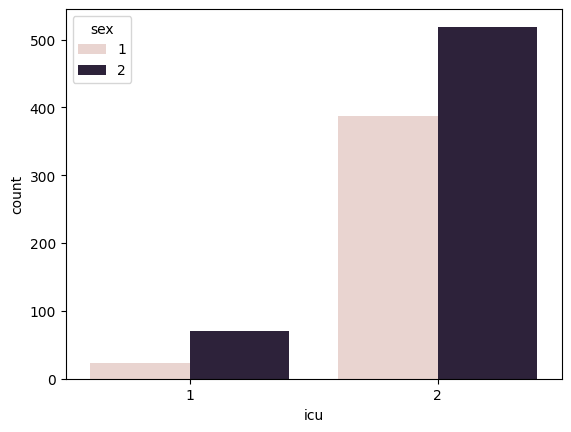

In [31]:
sb.countplot(x='icu', hue='sex', data=sample)

<Axes: xlabel='pneumonia', ylabel='count'>

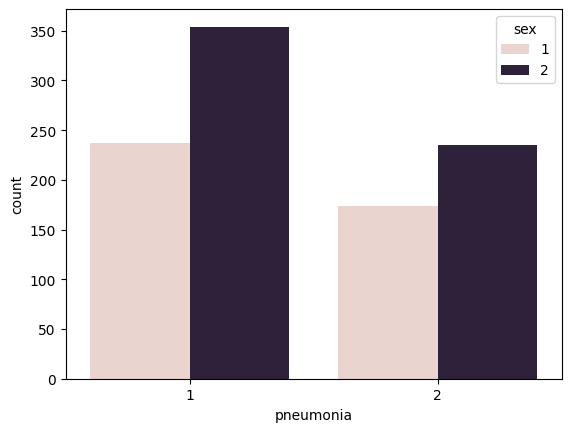

In [32]:
sb.countplot(x='pneumonia', hue='sex', data=sample)

<Axes: xlabel='count', ylabel='pneumonia'>

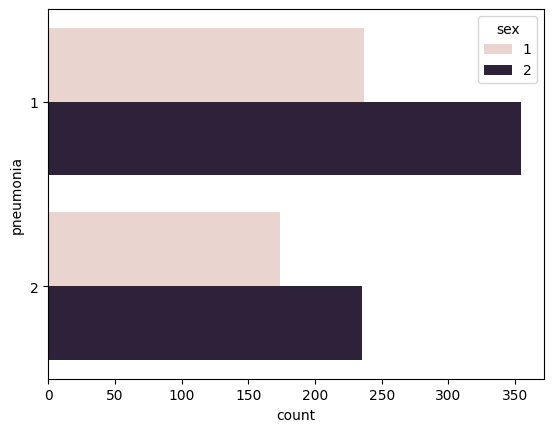

In [33]:
sb.countplot(y='pneumonia', hue='sex', data=sample)

###### Statistical Summary of the data

In [34]:
icu_df.describe()

,sex,patient_type,intubed,pneumonia,age,pregnancy,diabetes,copd,asthma,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res,icu
count,121788.000000,121788.0,121788.000000,121788.000000,121788.000000,121788.000000,121788.000000,121788.000000,121788.000000,121788.000000,121788.000000,121788.000000,121788.000000,121788.000000,121788.000000,121788.000000,121788.000000,121788.000000,121788.000000
mean,1.599394,2.0,1.918177,1.394949,52.965768,59.064506,2.236304,2.415254,2.435338,2.495665,2.149128,2.759993,2.457483,2.293707,2.420649,2.415542,51.310967,1.557879,1.916970
std,0.490023,0.0,0.274095,0.488842,19.234055,46.537743,7.131655,6.638203,6.641162,7.148388,6.811285,8.842071,6.980491,6.935166,6.779924,6.947704,48.636295,0.694662,0.275928
min,1.000000,2.0,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,2.0,2.000000,1.000000,42.000000,2.000000,1.000000,2.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000
50%,2.000000,2.0,2.000000,1.000000,55.000000,97.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,99.000000,1.000000,2.000000
75%,2.000000,2.0,2.000000,2.000000,66.000000,97.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,99.000000,2.000000,2.000000
max,2.000000,2.0,2.000000,2.000000,118.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,99.000000,3.000000,2.000000


In [35]:
icu_df.describe().T

,count,mean,std,min,25%,50%,75%,max
sex,121788.0,1.599394,0.490023,1.0,1.0,2.0,2.0,2.0
patient_type,121788.0,2.000000,0.000000,2.0,2.0,2.0,2.0,2.0
intubed,121788.0,1.918177,0.274095,1.0,2.0,2.0,2.0,2.0
pneumonia,121788.0,1.394949,0.488842,1.0,1.0,1.0,2.0,2.0
age,121788.0,52.965768,19.234055,0.0,42.0,55.0,66.0,118.0
pregnancy,121788.0,59.064506,46.537743,1.0,2.0,97.0,97.0,98.0
diabetes,121788.0,2.236304,7.131655,1.0,1.0,2.0,2.0,98.0
copd,121788.0,2.415254,6.638203,1.0,2.0,2.0,2.0,98.0
asthma,121788.0,2.435338,6.641162,1.0,2.0,2.0,2.0,98.0
inmsupr,121788.0,2.495665,7.148388,1.0,2.0,2.0,2.0,98.0


###### Information we can expect from .describe()

1. measure of scale across features in the data - we correct this by # `Rescaling`
2. measure of gaussian behaviour of the data - normal distribution - we correct this by # `Normalization`
3. measure of error or measure of dispersion in the data - we correct this by # `Standardization`
4. measure of skewness in the data - we correct this by # `de-skew`.

##### Measure of scale 
For scaling, you must always check the 'min - max' only for continuous features. If the data is categorical, you do not need to rescale the data and you only rescale for continuous data.

##### Measure of Dispersion

For dispersion, you must check the standard devition and anyone not close to 1 is problematic hence we need to correct them such that the mean is 0 and std is 1.

##### Measure of distribution

For normalization, you check the mean, and the 50th percentile and they must be approximately the same. For a distribution to be normal, the mean, median and the 50th percentile is approximately equals.

In [36]:
x = [1,2,3,4,5,6,7,8,9,10]

<Axes: ylabel='Density'>

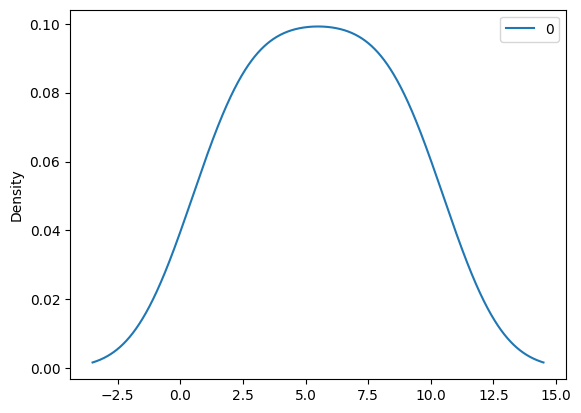

In [37]:
pd.DataFrame(x).plot(kind='density')

<Axes: ylabel='Density'>

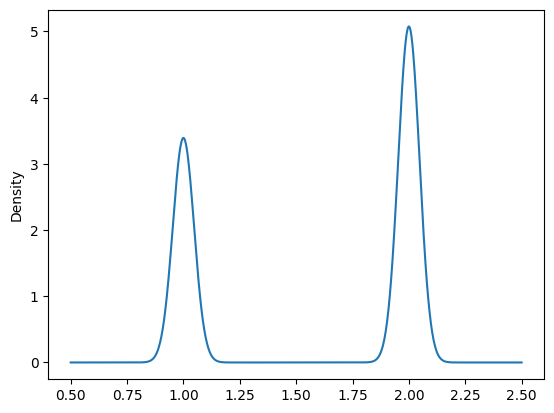

In [38]:
icu_df.sex.plot(kind='density')

<Axes: ylabel='Density'>

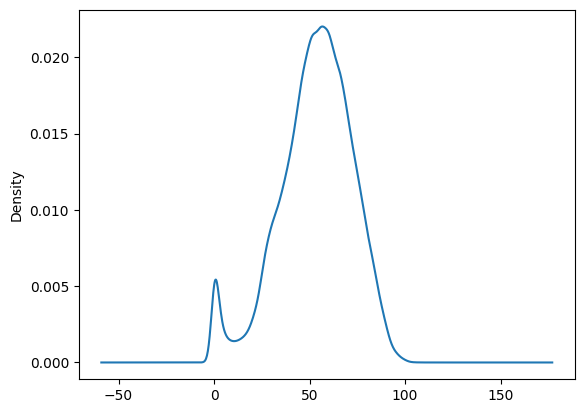

In [39]:
icu_df.age.plot(kind='density')

In [40]:
#### Outliers

x1 = [1,2,3,4,5,6,7,8,9,10,200]

<Axes: ylabel='Density'>

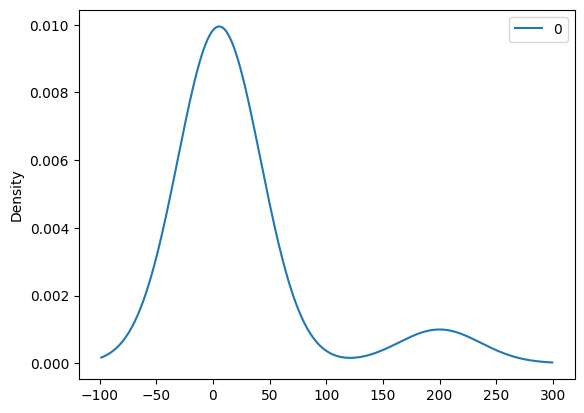

In [41]:
pd.DataFrame(x1).plot(kind='density')

#### Critically Examine the columns and build a predictive model to predict if patient is at the icu

In [42]:
covid_df.head()

,id,sex,patient_type,entry_date,date_symptoms,date_died,intubed,pneumonia,age,pregnancy,...,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res,icu
0,16169f,2,1,2020-04-05 00:00:00,2020-02-05 00:00:00,9999-99-99,97,2,27,97,...,2,2,2,2,2,2,2,2,1,97
1,1009bf,2,1,19-03-2020,17-03-2020,9999-99-99,97,2,24,97,...,2,2,2,2,2,2,2,99,1,97
2,167386,1,2,2020-06-04 00:00:00,2020-01-04 00:00:00,9999-99-99,2,2,54,2,...,2,2,2,2,1,2,2,99,1,2
3,0b5948,2,2,17-04-2020,2020-10-04 00:00:00,9999-99-99,2,1,30,97,...,2,2,2,2,2,2,2,99,1,2
4,0d01b5,1,2,13-04-2020,13-04-2020,22-04-2020,2,2,60,2,...,2,1,2,1,2,2,2,99,1,2


In [43]:
covid_df.columns

Index(['id', 'sex', 'patient_type', 'entry_date', 'date_symptoms', 'date_died',
       'intubed', 'pneumonia', 'age', 'pregnancy', 'diabetes', 'copd',
       'asthma', 'inmsupr', 'hypertension', 'other_disease', 'cardiovascular',
       'obesity', 'renal_chronic', 'tobacco', 'contact_other_covid',
       'covid_res', 'icu'],
      dtype='object')

In [44]:
covid_df['id'].value_counts()

id
0.00E+00    210
1.56E+03      9
1.50E+09      9
1.80E+07      9
1.05E+08      8
           ... 
12dcdc        1
13defb        1
124c1d        1
0ce769        1
0021c9        1
Name: count, Length: 563200, dtype: int64

In [47]:
covid_df['id'].unique()

array(['16169f', '1009bf', 167386, ..., '1beb81', '16fb02', '0021c9'],
      dtype=object)

In [48]:
covid_df['id'].nunique()

563200

In [78]:
def column_detail(df):
    cols = list(df.columns)
    for col in cols:
        #print(col)
        #print(df[col].value_counts())
        #print(col, df[col].nunique())
        print(f"The unique category in the {col} column is {df[col].nunique()}") 

In [79]:
column_detail(covid_df)

The unique category in the id column is 563200
The unique category in the sex column is 2
The unique category in the patient_type column is 2
The unique category in the entry_date column is 181
The unique category in the date_symptoms column is 181
The unique category in the date_died column is 124
The unique category in the intubed column is 4
The unique category in the pneumonia column is 3
The unique category in the age column is 120
The unique category in the pregnancy column is 4
The unique category in the diabetes column is 3
The unique category in the copd column is 3
The unique category in the asthma column is 3
The unique category in the inmsupr column is 3
The unique category in the hypertension column is 3
The unique category in the other_disease column is 3
The unique category in the cardiovascular column is 3
The unique category in the obesity column is 3
The unique category in the renal_chronic column is 3
The unique category in the tobacco column is 3
The unique category

###### The splitted dataset based on the icu

In [80]:
icu_df.head()

,id,sex,patient_type,entry_date,date_symptoms,date_died,intubed,pneumonia,age,pregnancy,...,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res,icu
2,167386,1,2,2020-06-04 00:00:00,2020-01-04 00:00:00,9999-99-99,2,2,54,2,...,2,2,2,2,1,2,2,99,1,2
3,0b5948,2,2,17-04-2020,2020-10-04 00:00:00,9999-99-99,2,1,30,97,...,2,2,2,2,2,2,2,99,1,2
4,0d01b5,1,2,13-04-2020,13-04-2020,22-04-2020,2,2,60,2,...,2,1,2,1,2,2,2,99,1,2
5,1beec8,2,2,16-04-2020,16-04-2020,29-04-2020,2,1,47,97,...,2,2,2,2,2,2,2,99,1,1
6,1.75E+56,2,2,22-04-2020,13-04-2020,9999-99-99,2,2,63,97,...,2,1,2,2,2,2,2,99,1,2


In [81]:
icu_not_spec.head()

,id,sex,patient_type,entry_date,date_symptoms,date_died,intubed,pneumonia,age,pregnancy,...,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res,icu
0,16169f,2,1,2020-04-05 00:00:00,2020-02-05 00:00:00,9999-99-99,97,2,27,97,...,2,2,2,2,2,2,2,2,1,97
1,1009bf,2,1,19-03-2020,17-03-2020,9999-99-99,97,2,24,97,...,2,2,2,2,2,2,2,99,1,97
7,0ce1f5,1,1,21-05-2020,18-05-2020,9999-99-99,97,2,56,2,...,2,1,2,2,2,1,1,1,1,97
8,12b57a,1,1,22-04-2020,18-04-2020,9999-99-99,97,2,41,2,...,2,2,2,2,2,2,2,99,1,97
11,17e2a5,1,1,29-04-2020,27-04-2020,9999-99-99,97,2,45,2,...,2,2,2,2,2,2,2,99,1,97


###### We would build the predictive model using 'icu_df' that will be used to predict the 'not specified' entries in the 'icu'

In [88]:
covid_df.describe().T

,count,mean,std,min,25%,50%,75%,max
sex,566602.0,1.506726,0.499955,1.0,1.0,2.0,2.0,2.0
patient_type,566602.0,1.215165,0.410937,1.0,1.0,1.0,1.0,2.0
intubed,566602.0,76.562952,39.058676,1.0,97.0,97.0,97.0,99.0
pneumonia,566602.0,1.846262,0.560939,1.0,2.0,2.0,2.0,99.0
age,566602.0,42.622483,16.659973,0.0,31.0,41.0,53.0,120.0
pregnancy,566602.0,50.400692,47.501579,1.0,2.0,97.0,97.0,98.0
diabetes,566602.0,2.210633,5.683523,1.0,2.0,2.0,2.0,98.0
copd,566602.0,2.280221,5.327832,1.0,2.0,2.0,2.0,98.0
asthma,566602.0,2.265029,5.334658,1.0,2.0,2.0,2.0,98.0
inmsupr,566602.0,2.319628,5.667381,1.0,2.0,2.0,2.0,98.0


In [84]:
list(covid_df.columns).index('icu')

22

###### Extract the numerical columns only

In [98]:
icu_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 121788 entries, 2 to 566599
Data columns (total 23 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   id                   121788 non-null  object
 1   sex                  121788 non-null  int64 
 2   patient_type         121788 non-null  int64 
 3   entry_date           121788 non-null  object
 4   date_symptoms        121788 non-null  object
 5   date_died            121788 non-null  object
 6   intubed              121788 non-null  int64 
 7   pneumonia            121788 non-null  int64 
 8   age                  121788 non-null  int64 
 9   pregnancy            121788 non-null  int64 
 10  diabetes             121788 non-null  int64 
 11  copd                 121788 non-null  int64 
 12  asthma               121788 non-null  int64 
 13  inmsupr              121788 non-null  int64 
 14  hypertension         121788 non-null  int64 
 15  other_disease        121788 non-null  i

In [99]:
icu_df.drop(columns=['id','entry_date','date_symptoms','date_died'], inplace=True)

C:\Users\Olanrewaju Adegoke\AppData\Local\Temp\ipykernel_15116\1948301852.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  icu_df.drop(columns=['id','entry_date','date_symptoms','date_died'], inplace=True)


In [100]:
icu_df.head()

,sex,patient_type,intubed,pneumonia,age,pregnancy,diabetes,copd,asthma,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res,icu
2,1,2,2,2,54,2,2,2,2,2,2,2,2,1,2,2,99,1,2
3,2,2,2,1,30,97,2,2,2,2,2,2,2,2,2,2,99,1,2
4,1,2,2,2,60,2,1,2,2,2,1,2,1,2,2,2,99,1,2
5,2,2,2,1,47,97,1,2,2,2,2,2,2,2,2,2,99,1,1
6,2,2,2,2,63,97,2,2,2,2,1,2,2,2,2,2,99,1,2


In [103]:
list(icu_df.columns).index('icu')

18

In [101]:
# Convert to array

icu_df_arr = icu_df.values

In [104]:
# Splitting into X and y

X = icu_df_arr[:, :18]
y = icu_df_arr[:, 18]

In [114]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import joblib

In [105]:
# Standardize the X

scaler = StandardScaler()
scaler

StandardScaler()

In [106]:
scaler.fit(X)
X = scaler.transform(X)

###### Train_Test_Split the dataset

In [108]:
seed = 10
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=seed)

###### Build a Random_Forest Model

In [110]:
RF_model = RandomForestClassifier()
RF_model

RandomForestClassifier()

In [111]:
RF_model.fit(X_train, y_train)

RandomForestClassifier()

In [112]:
y_pred = RF_model.predict(X_test)
y_pred

array([1, 2, 2, ..., 2, 2, 2], dtype=int64)

In [113]:
score = RF_model.score(X_test, y_test)
score

0.910009031940225

###### Save the model

In [115]:
joblib.dump(RF_model, model_path + 'RF_covid_model_to_predict_v1.pkl')

['../models/RF_covid_model_to_predict_v1.pkl']

###### We now Preprocess the dataset that we want to predict the not specified category

In [116]:
icu_not_spec.head()

,id,sex,patient_type,entry_date,date_symptoms,date_died,intubed,pneumonia,age,pregnancy,...,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res,icu
0,16169f,2,1,2020-04-05 00:00:00,2020-02-05 00:00:00,9999-99-99,97,2,27,97,...,2,2,2,2,2,2,2,2,1,97
1,1009bf,2,1,19-03-2020,17-03-2020,9999-99-99,97,2,24,97,...,2,2,2,2,2,2,2,99,1,97
7,0ce1f5,1,1,21-05-2020,18-05-2020,9999-99-99,97,2,56,2,...,2,1,2,2,2,1,1,1,1,97
8,12b57a,1,1,22-04-2020,18-04-2020,9999-99-99,97,2,41,2,...,2,2,2,2,2,2,2,99,1,97
11,17e2a5,1,1,29-04-2020,27-04-2020,9999-99-99,97,2,45,2,...,2,2,2,2,2,2,2,99,1,97


In [117]:
icu_not_spec.drop(columns=['id','entry_date','date_symptoms','date_died'], inplace=True)
icu_not_spec.head()

C:\Users\Olanrewaju Adegoke\AppData\Local\Temp\ipykernel_15116\2614885686.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  icu_not_spec.drop(columns=['id','entry_date','date_symptoms','date_died'], inplace=True)


,sex,patient_type,intubed,pneumonia,age,pregnancy,diabetes,copd,asthma,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res,icu
0,2,1,97,2,27,97,2,2,2,2,2,2,2,2,2,2,2,1,97
1,2,1,97,2,24,97,2,2,2,2,2,2,2,2,2,2,99,1,97
7,1,1,97,2,56,2,2,2,2,2,1,2,2,2,1,1,1,1,97
8,1,1,97,2,41,2,2,2,2,2,2,2,2,2,2,2,99,1,97
11,1,1,97,2,45,2,2,2,2,2,2,2,2,2,2,2,99,1,97


In [125]:
list(icu_not_spec.columns).index('icu')

18

In [118]:
### Convert to Array

icu_not_spec_arr = icu_not_spec.values

In [126]:
# Select X and y

X = icu_not_spec_arr[:, :18]
y = icu_not_spec_arr[:, 18]

In [127]:
# Standardizing

scaler.fit(X)
X = scaler.transform(X)

###### Load the model to predict for y using the X. The model: y = f(X)

In [128]:
model_to_pred = joblib.load(model_path + 'RF_covid_model_to_predict_v1.pkl')
model_to_pred

RandomForestClassifier()

In [129]:
# Predict y

y = model_to_pred.predict(X)
y

array([2, 2, 2, ..., 2, 2, 2], dtype=int64)

In [135]:
# Scoring the model
model_to_pred.score(X, y)

1.0

In [ ]:
# Now populate the predictions on the dataset for not specified

In [136]:
labels=[97,98,99]
icu_not_spec.loc[icu_not_spec['icu'].isin(labels), 'icu'] = y

C:\Users\Olanrewaju Adegoke\AppData\Local\Temp\ipykernel_15116\3954006432.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  icu_not_spec.loc[icu_not_spec['icu'].isin(labels), 'icu'] = y


In [139]:
icu_not_spec.head()

,sex,patient_type,intubed,pneumonia,age,pregnancy,diabetes,copd,asthma,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res,icu
0,2,1,97,2,27,97,2,2,2,2,2,2,2,2,2,2,2,1,2
1,2,1,97,2,24,97,2,2,2,2,2,2,2,2,2,2,99,1,2
7,1,1,97,2,56,2,2,2,2,2,1,2,2,2,1,1,1,1,2
8,1,1,97,2,41,2,2,2,2,2,2,2,2,2,2,2,99,1,2
11,1,1,97,2,45,2,2,2,2,2,2,2,2,2,2,2,99,1,2


In [140]:
icu_not_spec.shape

(444814, 19)

##### Now consolidate the two dataset

In [146]:
covid_num_clean_data = pd.concat([icu_not_spec, icu_df], axis=0)
covid_num_clean_data.head()

,sex,patient_type,intubed,pneumonia,age,pregnancy,diabetes,copd,asthma,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res,icu
0,2,1,97,2,27,97,2,2,2,2,2,2,2,2,2,2,2,1,2
1,2,1,97,2,24,97,2,2,2,2,2,2,2,2,2,2,99,1,2
7,1,1,97,2,56,2,2,2,2,2,1,2,2,2,1,1,1,1,2
8,1,1,97,2,41,2,2,2,2,2,2,2,2,2,2,2,99,1,2
11,1,1,97,2,45,2,2,2,2,2,2,2,2,2,2,2,99,1,2


In [144]:
covid_num_clean_data.icu.value_counts()

icu
2    552322
1     14280
Name: count, dtype: int64

In [145]:
covid_num_clean_data.icu.unique()

array([2, 1], dtype=int64)

##### Save the clean data for further analysis

In [147]:
covid_num_clean_data.to_csv(data_transform_path + 'covid_num_data_27022024_v1.csv')